# nominal cross-section (with $\Delta_{stat.}$) 

In [1]:
import sys; sys.path.insert(0, '../../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from Xsec_tools import *
%matplotlib inline
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/Xsec_results/'

versions:
{   'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'beam off': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'beam on': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'data date': '2018_08_16',
    'overlay date': '2018_09_22'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.051017899728 = N(POT on beam)/N(POT MC)


In [2]:
versions['beam on']='prod_reco_optfilter_bnb_v12_unblind_mcc8'
versions['beam off']='prod_reco_optfilter_extbnb_v12_mcc8_dev'
versions['data date']='2018_08_16'
versions['Overlay']='prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
versions['overlay date']='2018_09_22'

In [3]:
extract_Xsec_full_chain(force_recalculated_weights=False)

found selected overlay files from , loading them...
9538 selected CC1p events overlay
found  462 selected on beam and 15 beam off events...
found selected genie CC1p...
done loading samples...
efficiency weights already exist.
already performed correction for phi~0 and saved the samples...
saved  11969 selected overlay events to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_09_22_selected_overlay.csv
saved  9538 selected CC1p events to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_09_22_selected_CC1p.csv
saved  462 selected beam_on events to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prod_reco_optfilter_bnb_v12_unblind_mcc8_2018_08_16_selected_beam_on.csv
saved  15 selected beam_off events to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prod_reco_optfilter_bnb_v12_unblind_mcc8_2018_08_16_selected_beam_o

# Draw the nominal cross-sections

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/Xsec_results/nominal_Xsec_mu_without_last_ctu_bin.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/Xsec_results/nominal_Xsec_mu_with_last_ctu_bin.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/Xsec_results/nominal_Xsec_p_without_last_ctu_bin.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/Xsec_results/nominal_Xsec_p_with_last_ctu_bin.pdf


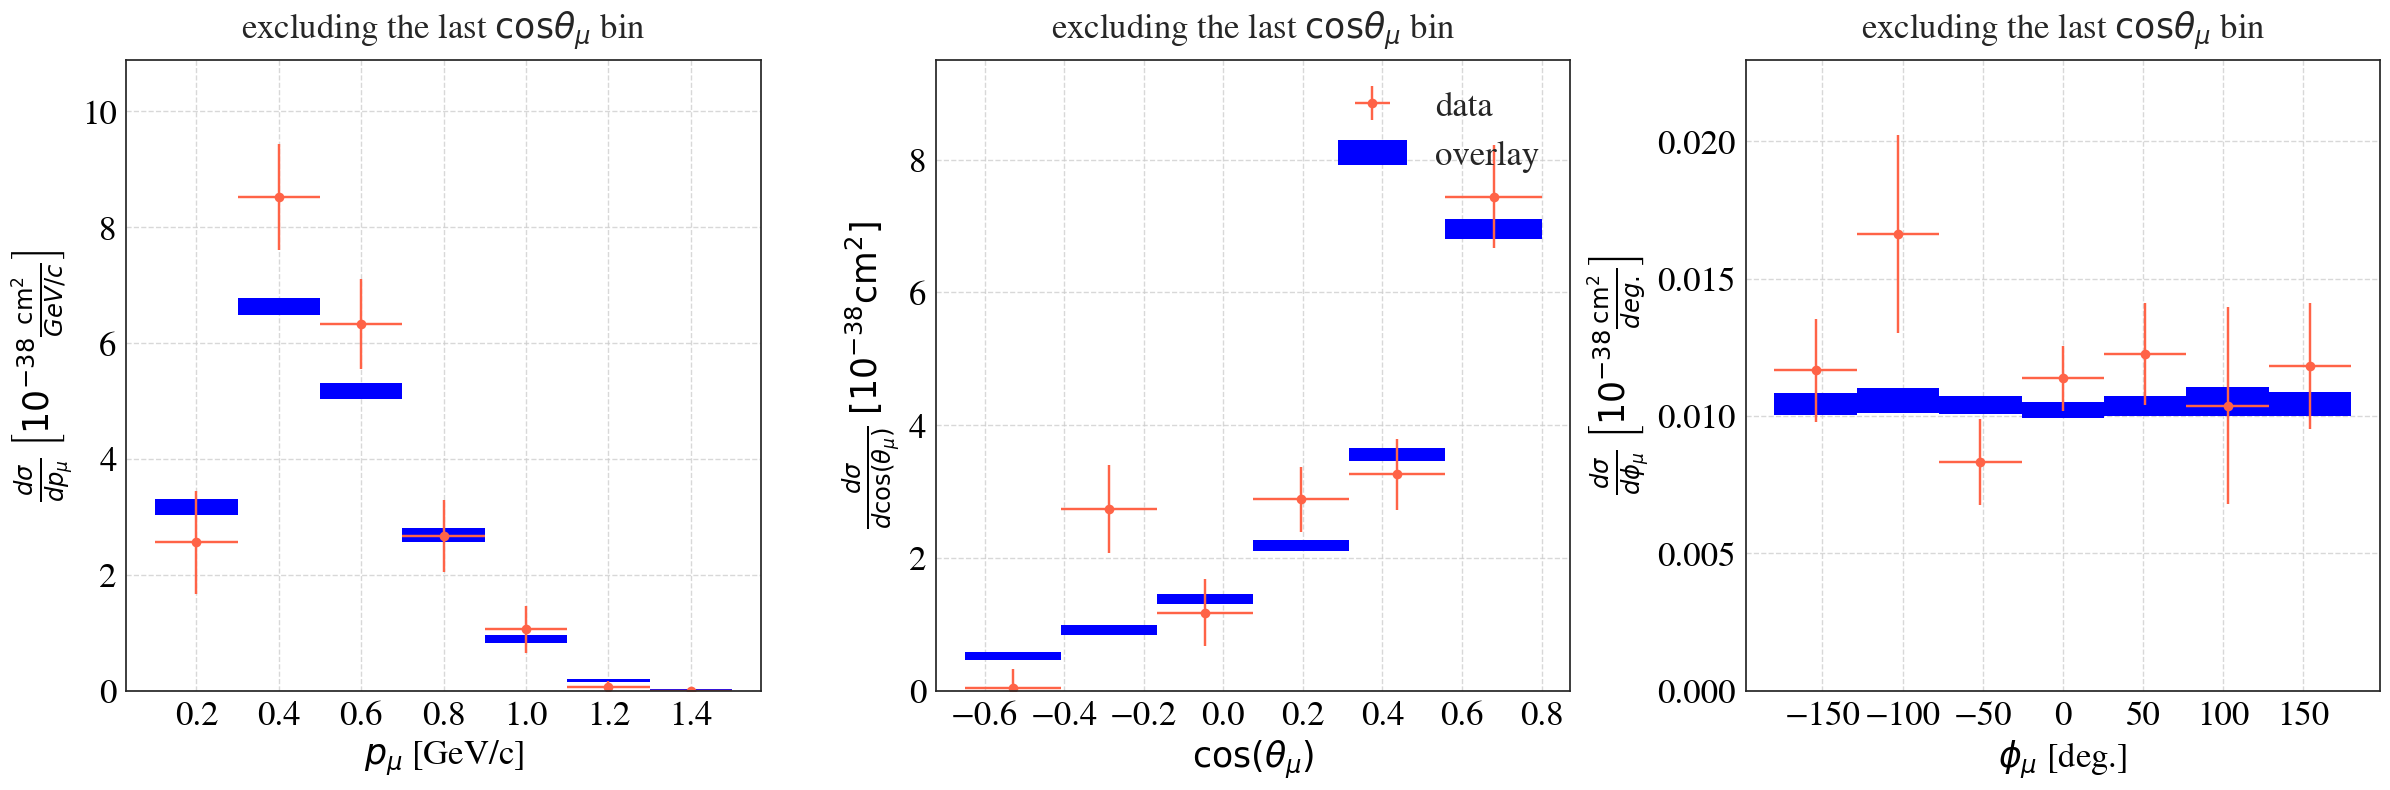

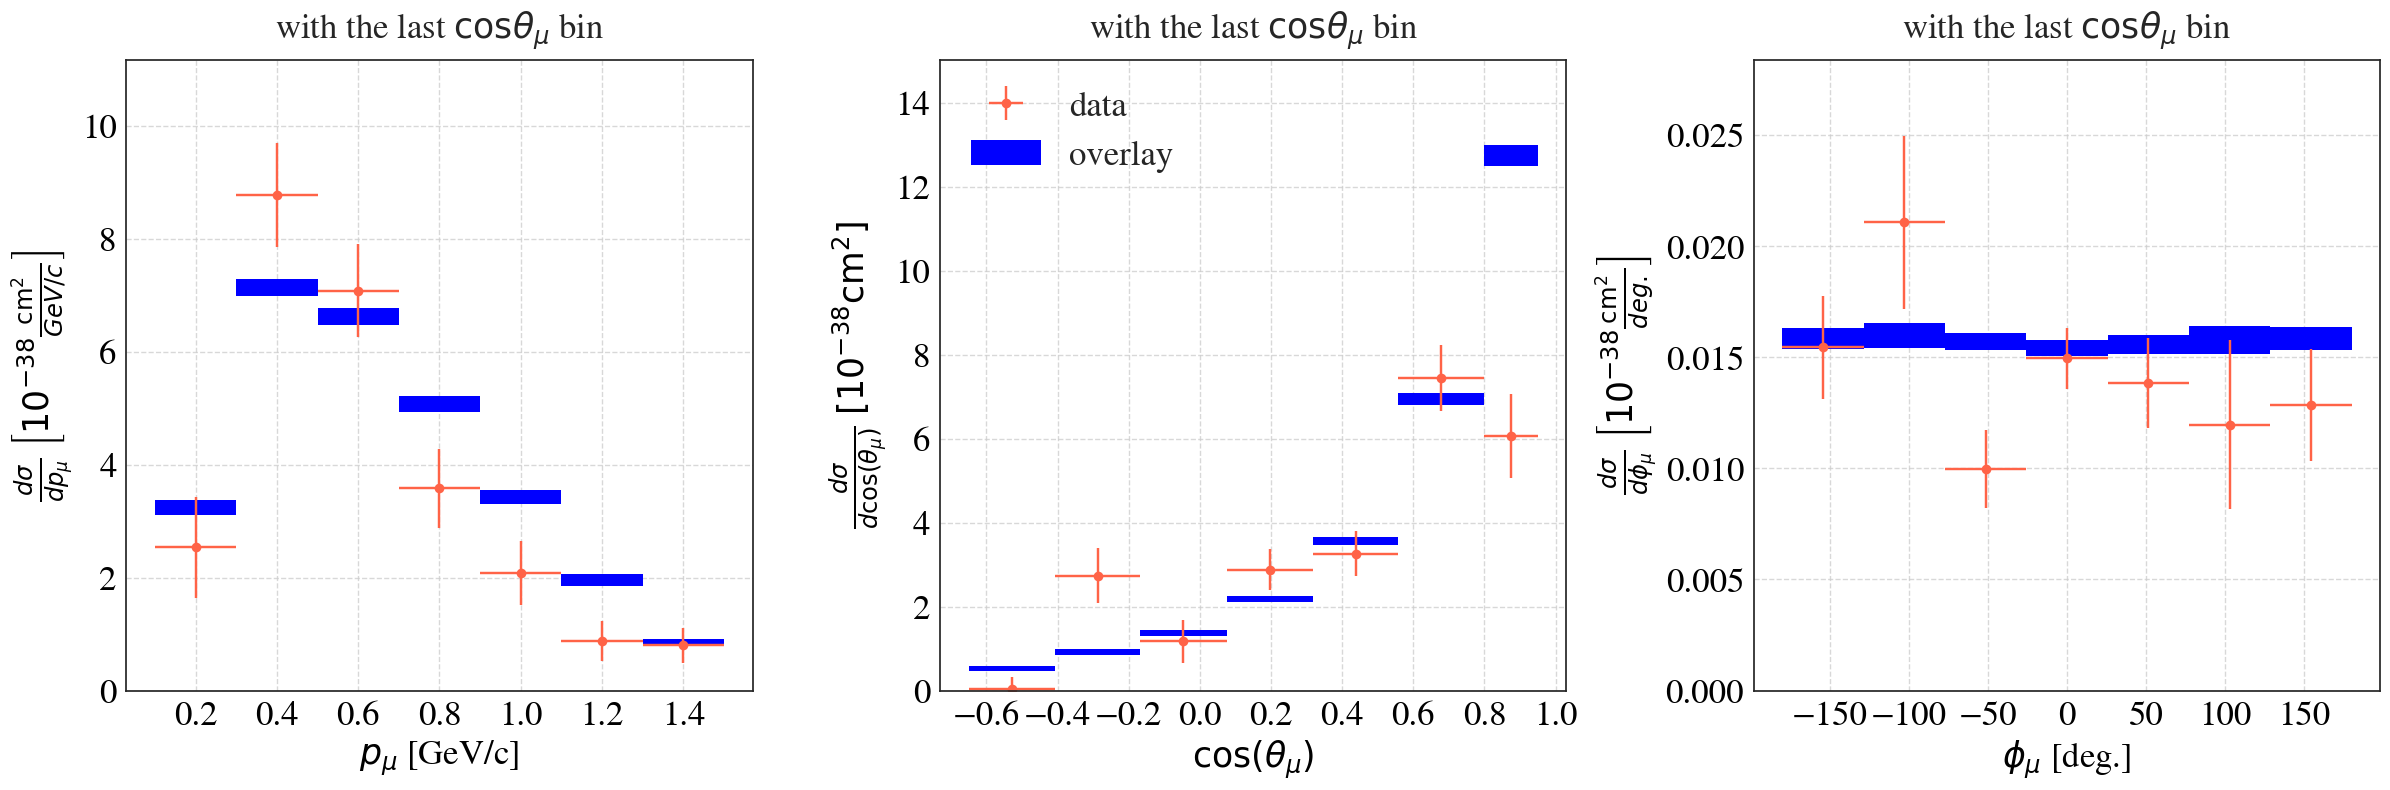

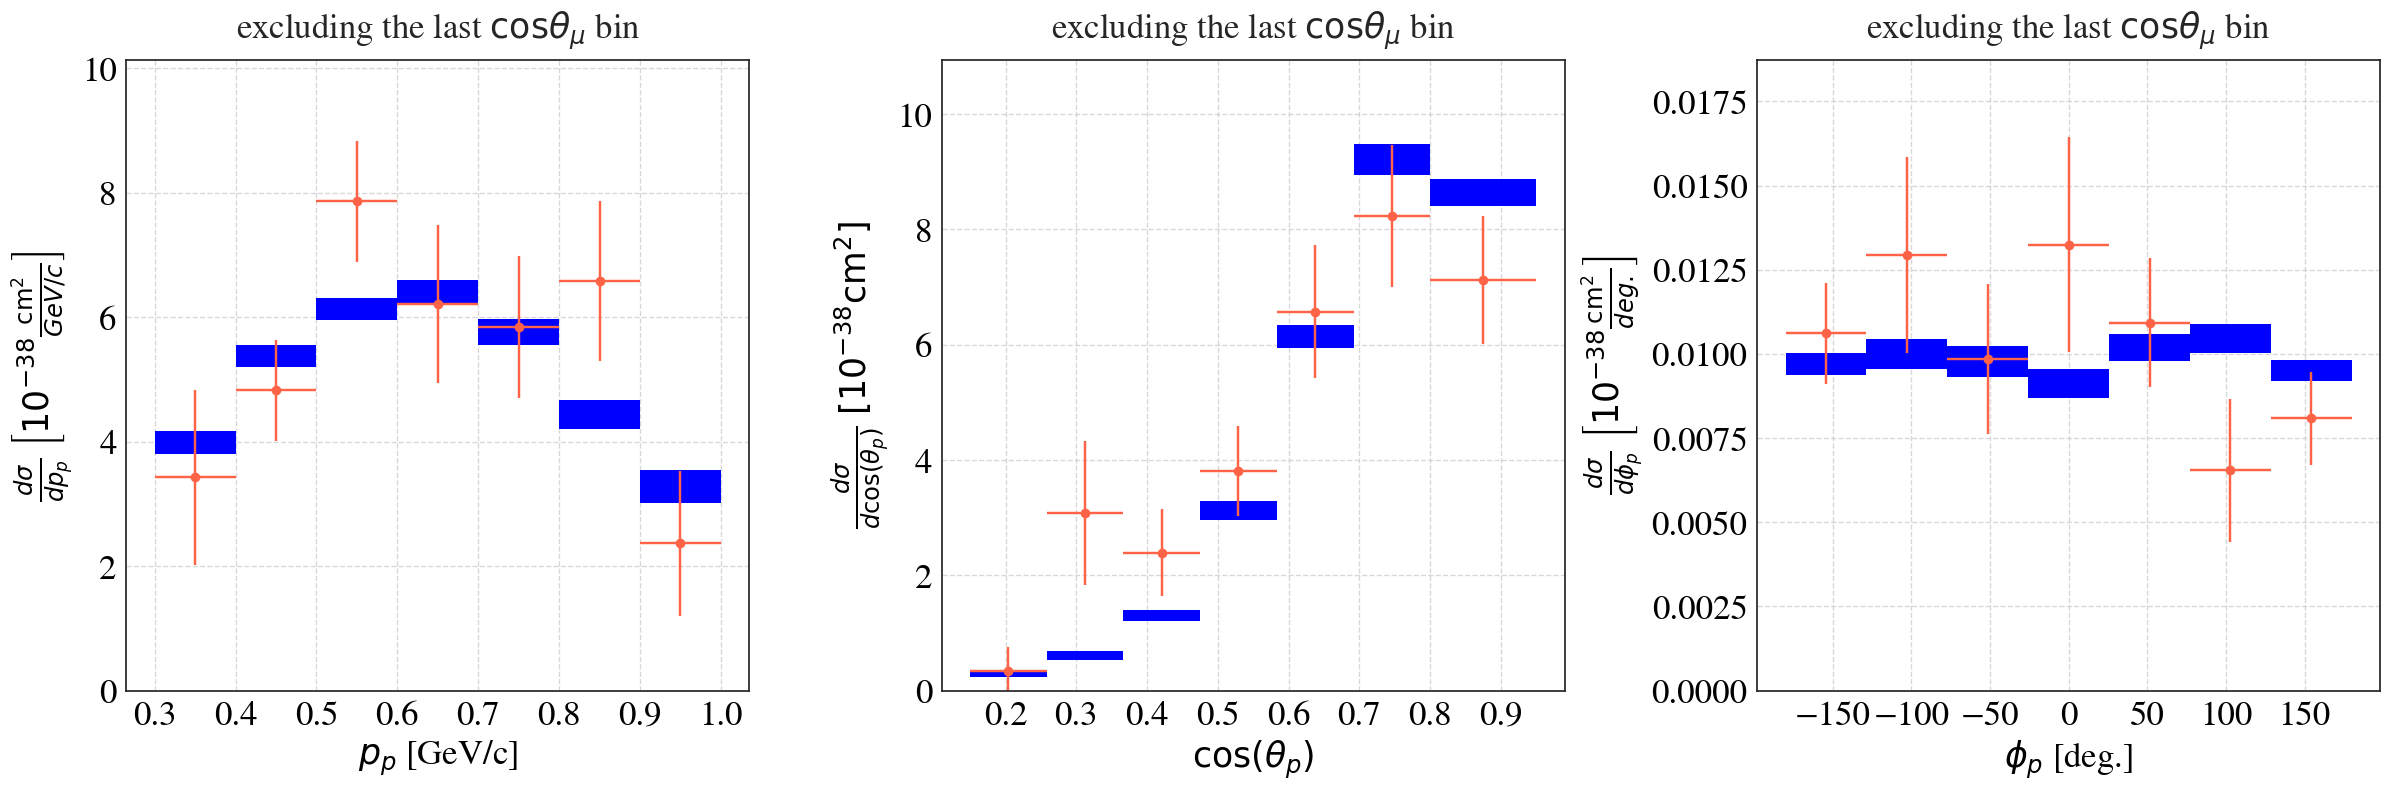

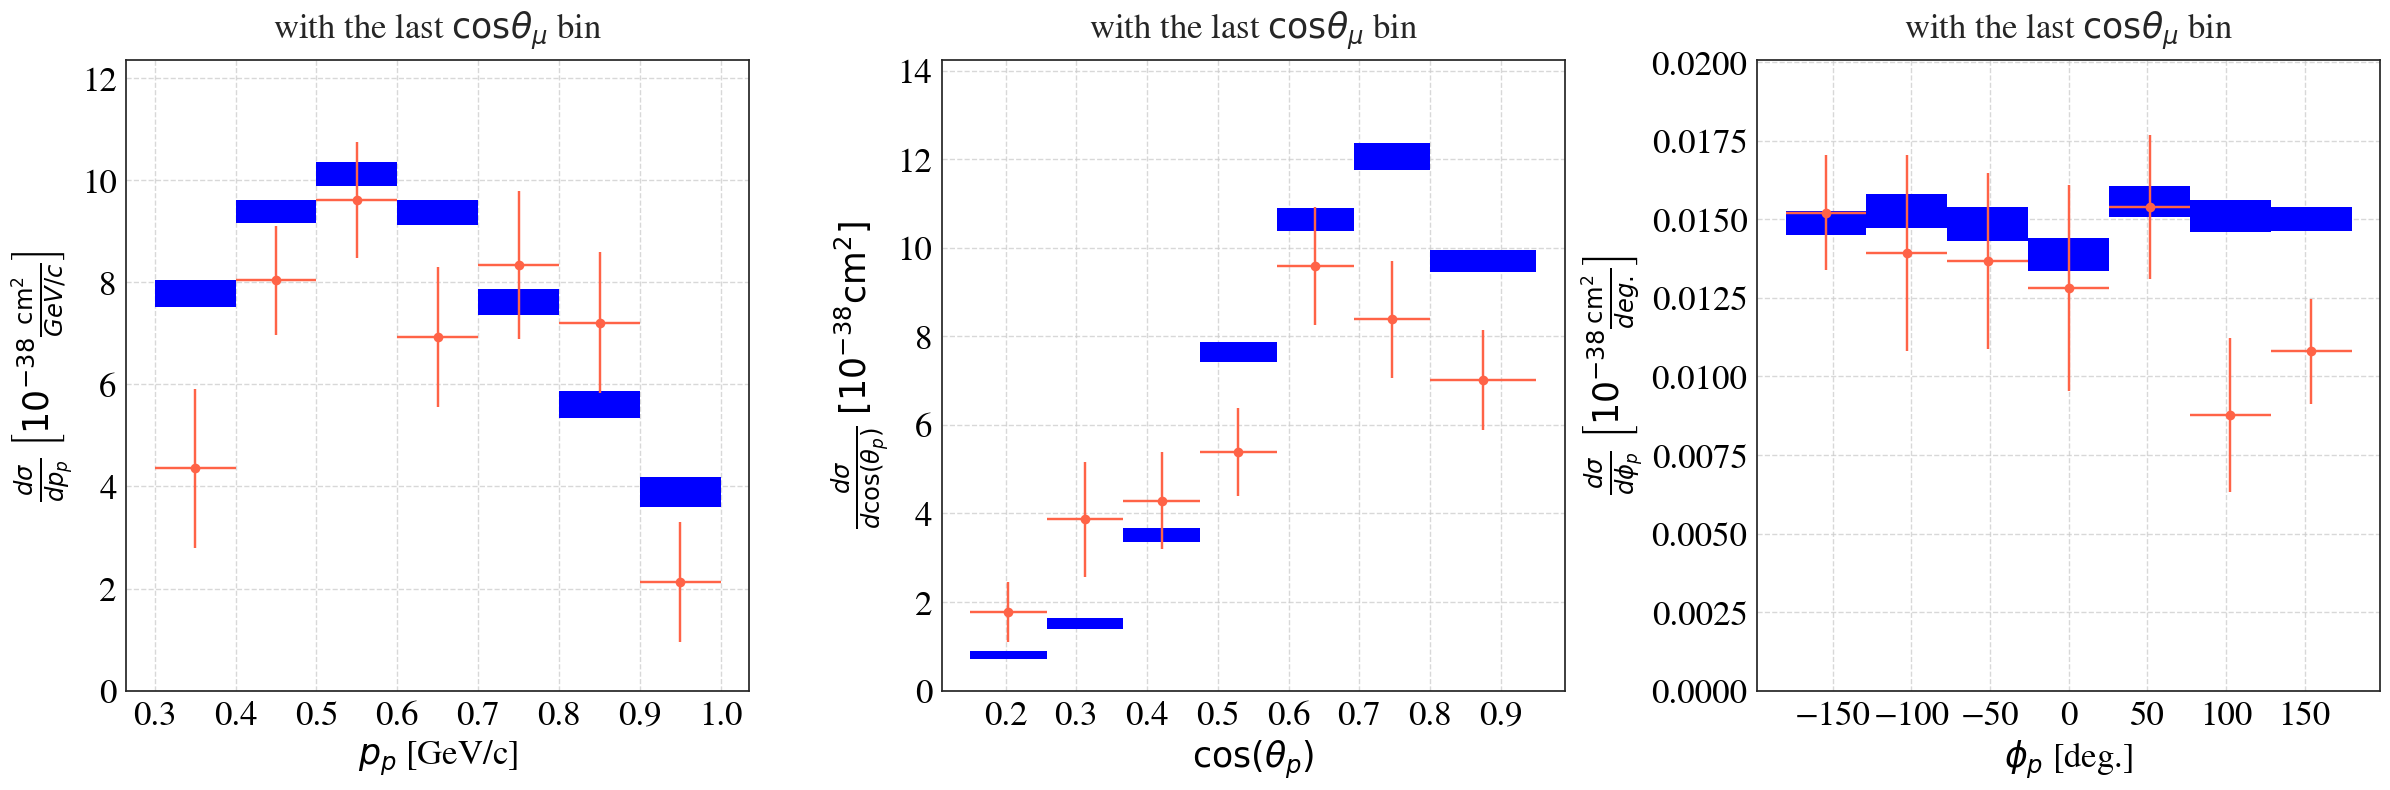

In [4]:
do_last_ctu_bin = True
for particle in ['mu','p']:
    with open(Paths['1d Xsec'] + "P" +particle + "Xsecs_1D.txt", 'rb') as infile:#{
        nominal_Xsec_dicts = pickle.load(infile)
    #}
    for iXsec,(Xsec_title,Xsec_fname,do_draw_Xsecs) in enumerate(zip(Xsec_ctu_titles,Xsec_fnames,[True,do_last_ctu_bin])):#{
        if do_draw_Xsecs==False: continue
        fig=plt.figure(figsize=(24,8))            
        Xsec_dict = nominal_Xsec_dicts[Xsec_title]
        for i,observable in enumerate(['P'+particle,'cos(theta('+particle+'))','phi('+particle+')']):#{
            var,vtrue,bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable=observable)
            h = dict()
            h['Xsec'],h['Xsec err'] = Xsec_dict[observable],Xsec_dict[observable+' err']
            h['mc Xsec'],h['mc Xsec err'] = Xsec_dict['mc '+observable], Xsec_dict['mc '+observable+' err']
            ax = fig.add_subplot(1,3,i+1)
            if iXsec==0 and var=='reco_Pmu_cos_theta':
                mid=mid[:-1]; bin_width=bin_width[:-1]; bins=bins[:-1]
                h['Xsec']=h['Xsec'][:-1];h['Xsec err']=h['Xsec err'][:-1]
                h['mc Xsec']=h['mc Xsec'][:-1];h['mc Xsec err']=h['mc Xsec err'][:-1]

            plt.errorbar(x=mid,xerr=0.5*bin_width,y=h['Xsec'],yerr=h['Xsec err'],color=Colors['beam on'],fmt='o',label='data')
            ax.bar( x=mid , height=2*h['mc Xsec err'], bottom=h['mc Xsec']-h['mc Xsec err'], width=bin_width, color=Colors['CC1p'],label='overlay') 

            set_axes(ax,xlabel,y_label=get_Xsec_label(vlabel,units)
                             ,do_add_grid=True,do_add_legend=True if 'Pmu_cos_theta' in var else False
                             ,ylim=(0,1.1*np.max(ax.get_ylim())))
            plt.title(Xsec_title, y=1.02,fontsize=25)
        plt.tight_layout(h_pad=0)
        save_figure(figures_path + 'nominal_Xsec_'+particle+'_'+Xsec_fname+'.pdf')

# Add GENIE models to the game and draw them on the same plot

In [5]:
afro_genie_CC1p_dict = dict()
path = '/Users/erezcohen/Desktop/uBoone/CCQEanalysis/afro_genie_samples/'
for gname in genie_list: 
    csvfilename = Paths['selected events'] + 'afro_genie_CC1p_' + gname + '.csv'
    if os.path.isfile( csvfilename ):#{
        afro_genie_CC1p_dict[gname] = pd.read_csv(csvfilename)
        print 'loaded',len(afro_genie_CC1p_dict[gname]),'afro GENIE CC1p '+gname+' events'
    #}
    else: #{
        afro_genie = pd.read_csv( path + 'CC_4_9E20_POT_mA_0_99'+'_'+gname+'.csv')
        print 'loaded',gname
        afro_genie_contained = afro_genie[(afro_genie.IsCC_1p_200MeVc==True)
                            & ((afro_genie.v_x>3) & (afro_genie.v_x<256))                        
                            & ((afro_genie.v_y>-115) & (afro_genie.v_y<115))                        
                            & ((afro_genie.v_z>5) & (afro_genie.v_z<1037))                        
                           ]
        afro_genie_in_limits = sample_in_limits(sam=afro_genie_contained
                                       ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'
                                       ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
        afro_genie_CC1p = afro_genie_in_limits[afro_genie_in_limits['IsCC_1p_200MeVc']==True]
        print len(afro_genie_CC1p),'afro GENIE CC1p'
        afro_genie_CC1p_in_cuts = afro_genie_CC1p[(np.abs(afro_genie_CC1p['theta_12']-90)<delta_theta_12)
                                                  &(afro_genie_CC1p['Pt']<Pt_max)
                                                  &(np.abs(afro_genie_CC1p['delta_phi']-180.)<delta_Delta_phi)]
        print len(afro_genie_CC1p_in_cuts),'afro GENIE CC1p in kinematical cuts'
        csvfilename = Paths['selected events'] + 'afro_genie_CC1p_' + gname + '.csv'
        afro_genie_CC1p_in_cuts.to_csv(csvfilename)
        print 'saved ',len(afro_genie_CC1p_in_cuts),'afro GENIE CC1p '+gname+' events to',csvfilename    
        afro_genie_CC1p_dict[gname] = afro_genie_CC1p_in_cuts    
    #}
print 'done loading afro GENIE files'

loaded 25833 afro GENIE CC1p nominal events
loaded 25918 afro GENIE CC1p hA2015 events
loaded 23167 afro GENIE CC1p hA_SRC events
loaded 27348 afro GENIE CC1p hA_Tune3 events
done loading afro GENIE files


In [6]:
for particle in ['mu','p']:
    genie_Xsec_dicts = dict()
    for iXsec,(remove_ctu_bin,Xsec_title,Xsec_name) in enumerate(zip(remove_ctu_bools,Xsec_ctu_titles,Xsec_fnames)):        
        genie_Xsec_dicts[Xsec_title] = dict()
        for i,observable in enumerate(['P'+particle,'cos(theta('+particle+'))','phi('+particle+')']):
            var,vtrue,bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable=observable)        
            mul = 180./np.pi if 'phi' in observable else 1

            for gname,ls,glabel in zip(genie_list,['-','--','-.',':'],genie_labels):#{
#                 do_absolute_Xsec = True
                genie_model_CC1p = afro_genie_CC1p_dict[gname]  
                if remove_ctu_bin: #{
                    genie_model_CC1p = genie_model_CC1p[genie_model_CC1p['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]
                #}
#                 if do_absolute_Xsec:#{
                genie_model_Xsec,genie_model_Xsec_err = compute_Xsec(Non=len(genie_model_CC1p), Non_err=np.sqrt(len(genie_model_CC1p)))                
                genie_Xsec_dicts[Xsec_title][gname+' Xsec'] = genie_model_Xsec*4.908e19/4.9e20
                genie_Xsec_dicts[Xsec_title][gname+' Xsec err'] = genie_model_Xsec_err*4.908e19/4.9e20
#                     do_absolute_Xsec = False
                #}
                h_genie,_ = np.histogram(mul*genie_model_CC1p[vtrue],bins=bins)
                h_genie_err = np.sqrt(h_genie)
                genie_Xsec,genie_Xsec_err = np.zeros((len(bins)-1)), np.zeros((len(bins)-1))
                for i_bin in range(len(bins)-1):#{
                    genie_Xsec[i_bin],genie_Xsec_err[i_bin] = compute_Xsec(Non=h_genie[i_bin]*4.908e19/4.9e20, 
                                                                           Non_err=h_genie_err[i_bin]*4.908e19/4.9e20,                
                                                                           eff=1, bin_width=bin_width[i_bin] )
                #}
                genie_Xsec_dicts[Xsec_title][gname+' '+observable] = genie_Xsec
                genie_Xsec_dicts[Xsec_title][gname+' '+observable+' err'] = genie_Xsec_err
            #}
        #}
        print 'done',Xsec_title
    outfilename = Paths['1d Xsec'] + "P"+particle + "_genie_Xsecs_1D.txt"
    with open(outfilename, 'w') as outfile:#{
        outfile.write(pickle.dumps(genie_Xsec_dicts))
    #}    
    print 'done',particle,'saved into \n',outfilename
print 'done.'

done excluding the last $\cos\theta_\mu$ bin
done with the last $\cos\theta_\mu$ bin
done mu saved into 
/Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/1d_Xsec/Pmu_genie_Xsecs_1D.txt
done excluding the last $\cos\theta_\mu$ bin
done with the last $\cos\theta_\mu$ bin
done p saved into 
/Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/1d_Xsec/Pp_genie_Xsecs_1D.txt
done.


In [5]:
def draw_Xsecs(do_add_afro_genie = True, do_corr_phi_0=False, debug=0, particle='mu',
               do_last_ctu_bin = True,figsize=(24,8)):
    Sigmas_Summary = dict()
    with open(Paths['1d Xsec'] + "P" +particle + "Xsecs_1D.txt", 'rb') as infile:
        nominal_Xsec_dicts = pickle.load(infile)
    with open(Paths['1d Xsec'] + "P" +particle + "_genie_Xsecs_1D.txt", 'rb') as infile:
        Xsec_dicts_genie = pickle.load(infile)

    for iXsec,(Xsec_title,Xsec_fname,do_cos_theta,do_draw_Xsecs) in enumerate(zip(Xsec_ctu_titles,Xsec_fnames,[True,False],[True,do_last_ctu_bin])):#{
        if do_draw_Xsecs==False: continue
        fig=plt.figure(figsize=(24,8))            
        Xsec_dict = nominal_Xsec_dicts[Xsec_title]
        Xsec_genie_dict = Xsec_dicts_genie[Xsec_title]

        for i,(observable,ivar) in enumerate(zip(['P'+particle,'cos(theta('+particle+'))','phi('+particle+')'],[(1,4),(2,5),(3,6)])):#{
            var,vtrue,bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable=observable)
            if 'cos_theta' in var and do_cos_theta==False: continue

            h = dict()
            h['Xsec'],h['Xsec err'] = Xsec_dict[observable],Xsec_dict[observable+' err']
            h['mc Xsec'],h['mc Xsec err'] = Xsec_dict['mc '+observable], Xsec_dict['mc '+observable+' err']
            ax = fig.add_subplot(3,3,ivar)
            if iXsec==0 and var=='reco_Pmu_cos_theta':
                mid=mid[:-1]; bin_width=bin_width[:-1]; bins=bins[:-1]
                h['Xsec']=h['Xsec'][:-1];h['Xsec err']=h['Xsec err'][:-1]
                h['mc Xsec']=h['mc Xsec'][:-1];h['mc Xsec err']=h['mc Xsec err'][:-1]

            plt.errorbar(x=mid,xerr=0.5*bin_width,y=h['Xsec'],yerr=h['Xsec err'],color=Colors['beam on'],fmt='o',label='data')
            ax.bar( x=mid , height=2*h['mc Xsec err'], bottom=h['mc Xsec']-h['mc Xsec err'], width=bin_width, color=Colors['CC1p'],label='overlay') 
            # ----------- #
            # genie models
            for gname,ls,glabel in zip(genie_list,['-','--','-.',':'],genie_labels):#{
                mystep(x=mid ,x_width=bin_width, 
                           y=Xsec_genie_dict[gname+' '+observable], 
                           y_width=Xsec_genie_dict[gname+' '+observable+' err'],
                           color='black',linestyle=ls,linewidth=3,label=glabel)

            # depict a line simboling the removal of the last cos(theta) bin
            if 'Pmu_cos_theta' in var: plt.plot([bins[-2],bins[-2]],ax.get_ylim(),'--',color='black')

            set_axes(ax,xlabel,y_label=get_Xsec_label(vlabel,units)
                             ,do_add_grid=True,do_add_legend=True if 'Pmu_cos_theta' in var else False
                             ,ylim=(0,1.1*np.max(ax.get_ylim())))
            plt.title(Xsec_title, y=1.02,fontsize=25)
            
            # ----------- #
            # residuals plot
            den, den_err = h['Xsec']-h['mc Xsec'],np.sqrt(np.square(h['Xsec err'])+np.square(h['mc Xsec err']))
            num, num_err = h['Xsec'],h['mc Xsec err']
            ratio = den/num
            ax = fig.add_subplot(3,3,7+i)
            ratio_err = ratio*np.sqrt(np.square(den_err/den) + np.square(num_err/num))
            plt.errorbar(x=mid,xerr=0.5*bin_width,y=ratio,yerr=ratio_err,fmt='o',markersize=0,color='black')
            chi2,ndf = chi2_two_data_curves(h1=h['Xsec'],h1err=h['Xsec err'],h2=h['mc Xsec'],h2err=h['mc Xsec err'],bins=bins,debug=0)
            set_axes(ax,xlabel,y_label=r'(data-MC)/data',do_add_grid=True)
            plt.plot([np.min(bins),np.max(bins)],[0,0],'--',color='royalblue')
            plt.title(r'$\chi^2/ndf=%.2f/%d$'%(chi2,ndf), fontsize=20,y=0.80)

            # depict a line simboling the removal of the last cos(theta) bin
            if 'Pmu_cos_theta' in var: plt.plot([bins[-2],bins[-2]],ax.get_ylim(),'--',color='black')
                    
            # add text in the middle ax: the integrated cross sections
            Sigmas = [Xsec_dict['integrated Xsec'],Xsec_dict['mc Xsec'],Xsec_genie_dict['nominal Xsec'],Xsec_genie_dict['hA2015 Xsec'],Xsec_genie_dict['hA_SRC Xsec'],Xsec_genie_dict['hA_Tune3 Xsec']]
            Sigmas_err = [Xsec_dict['integrated Xsec err'],Xsec_dict['mc Xsec err'],Xsec_genie_dict['nominal Xsec err'],Xsec_genie_dict['hA2015 Xsec err'],Xsec_genie_dict['hA_SRC Xsec err'],Xsec_genie_dict['hA_Tune3 Xsec err']]
            Sigmas_Summary[Xsec_fname] = (Sigmas,Sigmas_err)
                
            Slabels = ['','overlay','GENIE(nominal)','GENIE(hA2015)','GENIE(SRC+hA)','GENIE(Tune3+hA)']
            Scolors = [Colors['beam on'],Colors['CC1p'],'black','black','black','black']
                 
            if iXsec==1:
                for jXsec,jax,jtitle,jXsec_name in zip([0,1],[2,8],Xsec_ctu_titles,Xsec_fnames):
                    Sigmas,Sigmas_err = Sigmas_Summary[jXsec_name]
                    ax=fig.add_subplot(3,3,jax)
                    for iSigma,(Sigma,Sigma_err,label,color) in enumerate(zip(Sigmas,Sigmas_err,Slabels,Scolors)):
                        plt.text(0.01,0.85-0.15*iSigma
                                     ,r'$\sigma_{'+label+r'} =(%.2f \pm %.2f)$%s'%(Sigma,Sigma_err,get_Xsec_label())
                                     ,color=color,fontsize=20)
                    set_axes(ax,'',ticks_color='white',title=jtitle)
            
        plt.tight_layout(h_pad=0)
        figurename = 'Xsec_1D_P'+particle
        
        plt.tight_layout(h_pad=0.0)
        plt.subplots_adjust(hspace=0.05)        
        save_figure(figures_path + figurename + '_' + Xsec_fname + '.pdf')
        

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/Xsec_results/Xsec_1D_Pmu_without_last_ctu_bin.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/Xsec_results/Xsec_1D_Pmu_with_last_ctu_bin.pdf


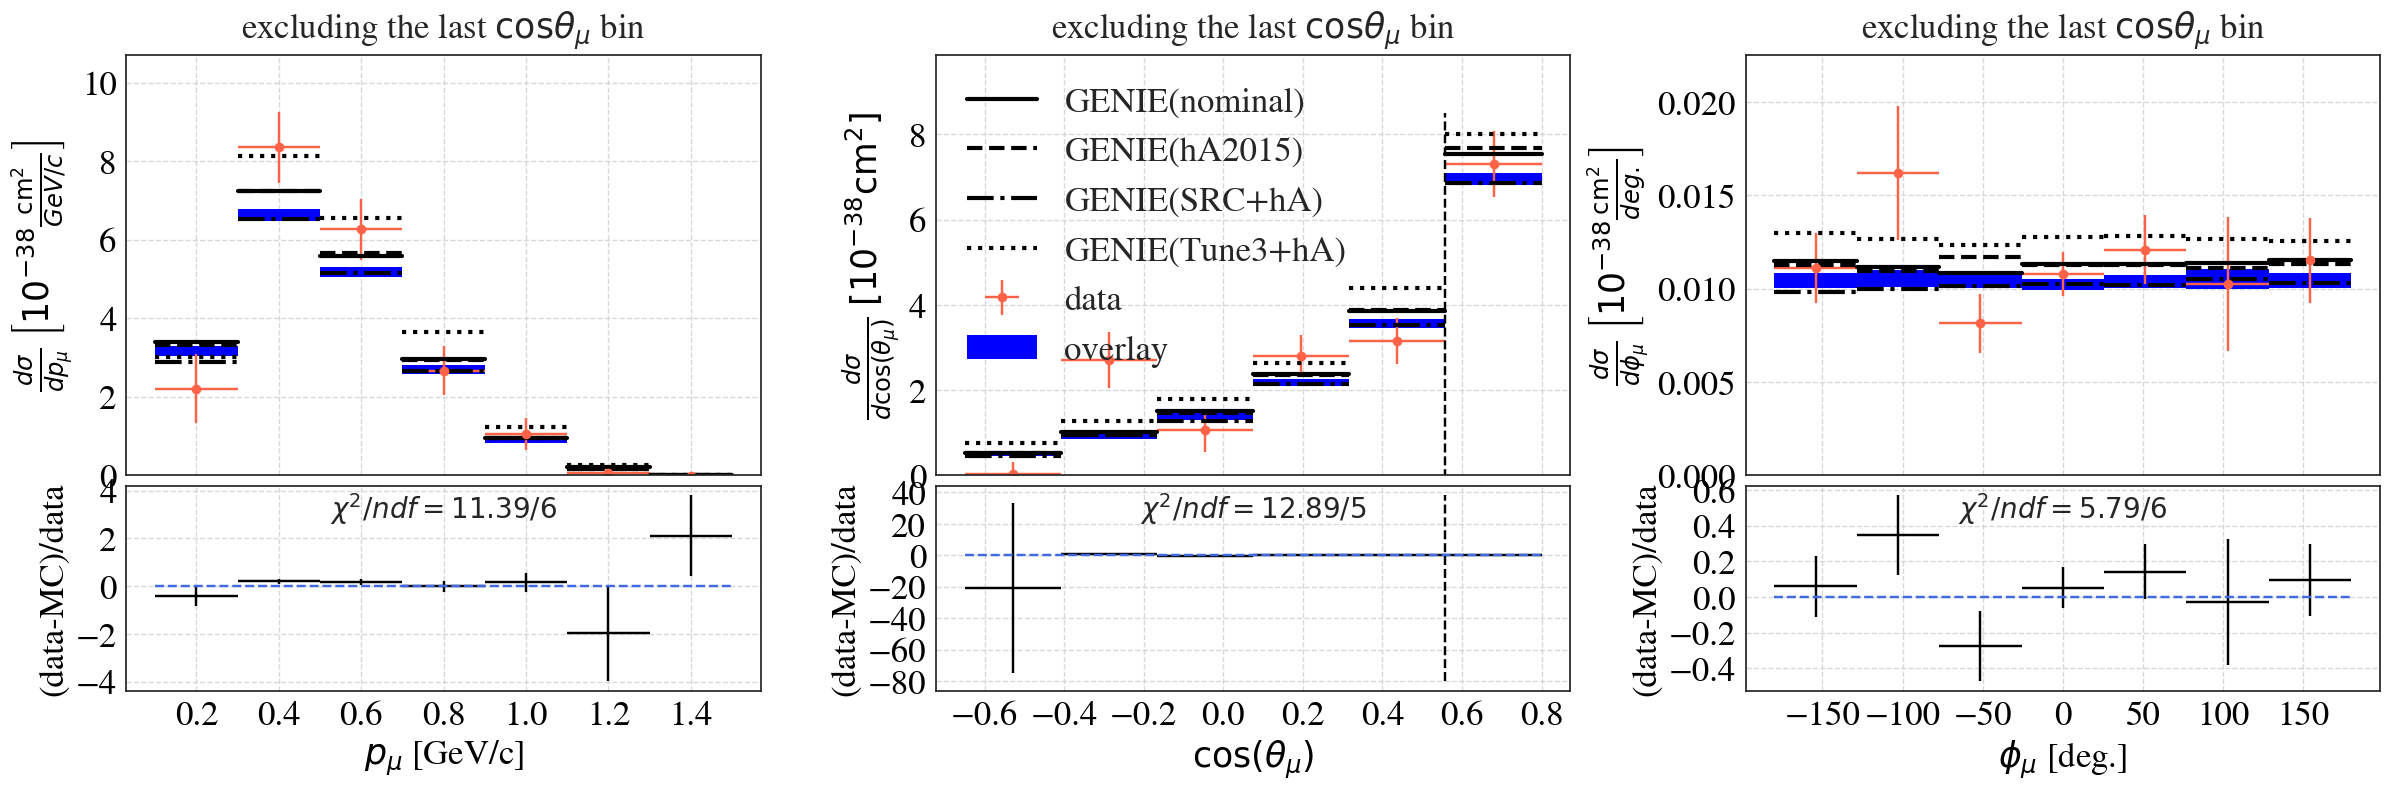

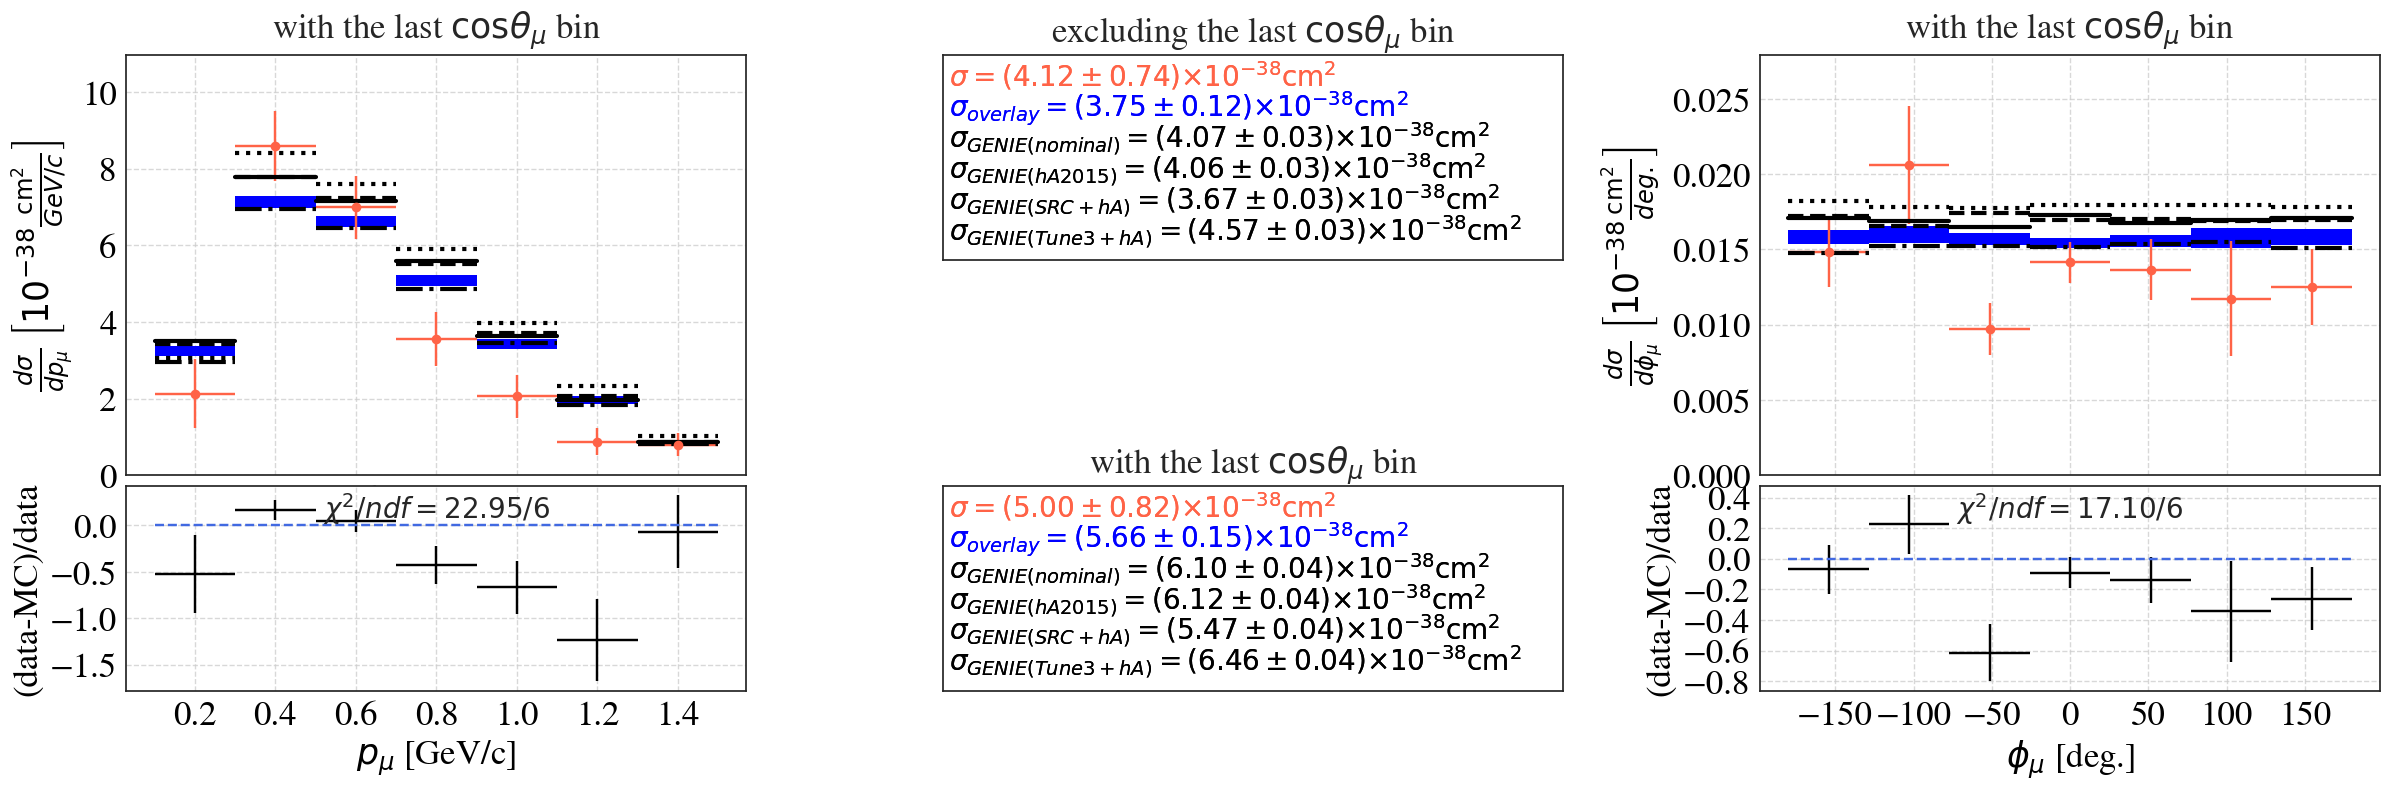

In [14]:
draw_Xsecs(do_add_afro_genie = True,debug=0,particle='mu',figsize=(24,8));

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/Xsec_results/Xsec_1D_Pp_without_last_ctu_bin.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/Xsec_results/Xsec_1D_Pp_with_last_ctu_bin.pdf


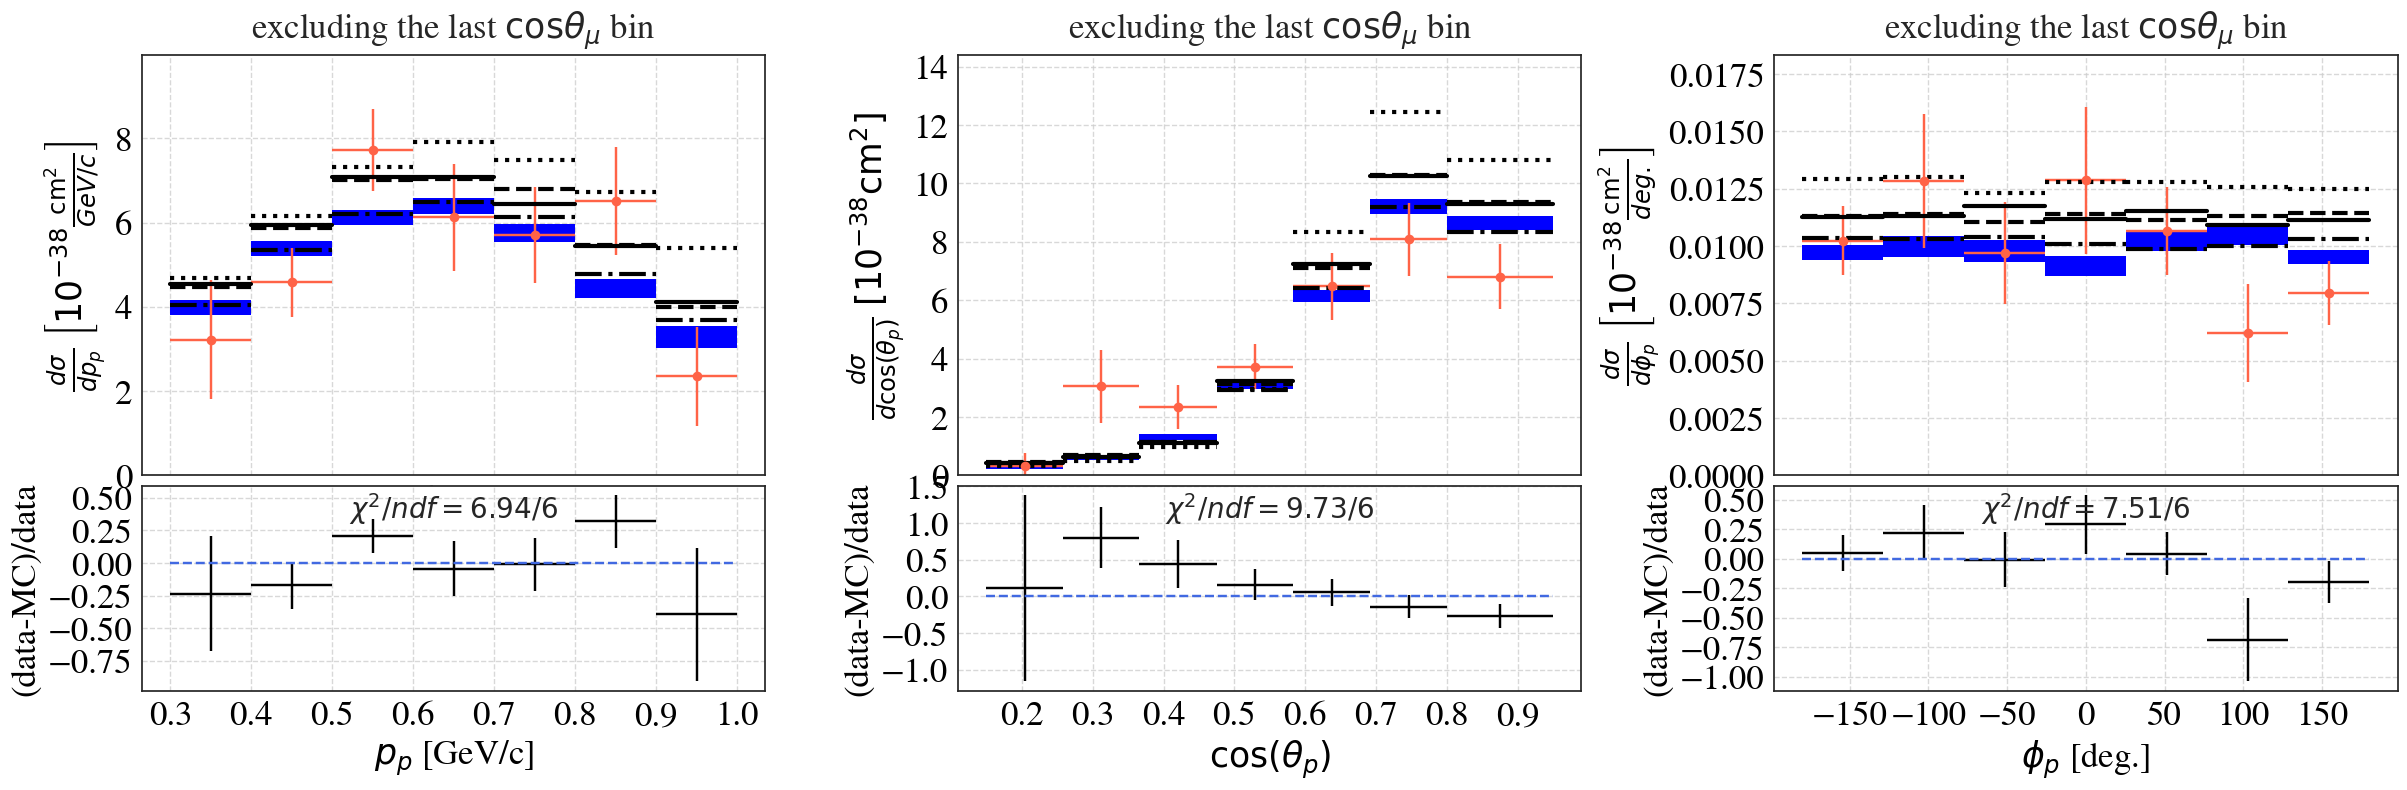

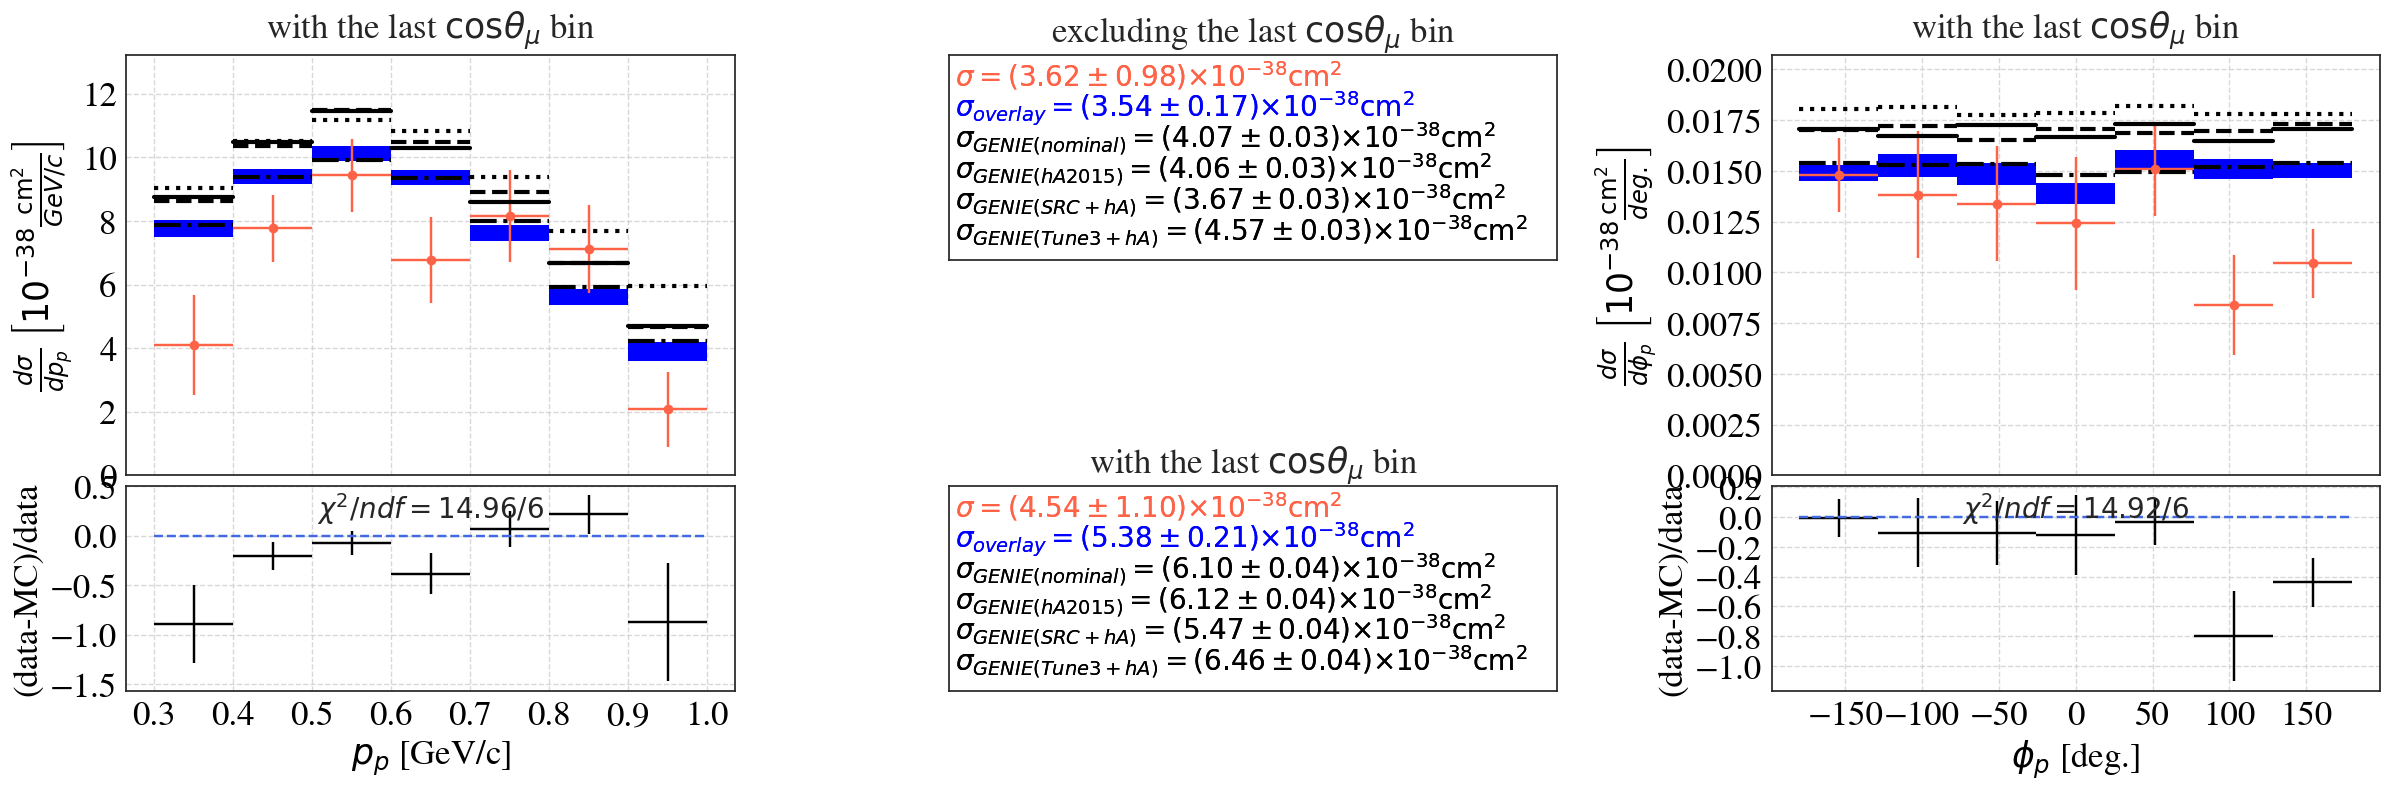

In [15]:
draw_Xsecs(do_add_afro_genie = True,debug=0,particle='p',figsize=(24,8));